In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
X = data[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']]
y = data['SalePrice']

In [5]:
# Разбиваем на train/test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3 )

### Беггинг

Подготовим данные

In [6]:
#Находим категориальные признаки
cat_feat = list(data.dtypes[data.dtypes == object].index)

#закодируем пропущенные значений строкой, факт пропущенного значения тоже может нести в себе информацию
data[cat_feat] = data[cat_feat].fillna('nan')

#отфильтруем непрерывные признаки
num_feat = [f for f in data if f not in (cat_feat + ['ID', 'SalePrice'])]

# Смотрим сколько у нас значений по каждому категориальному признаку
cat_nunique = X_train[cat_feat].nunique()
print(cat_nunique)

#Чтобы в разы не увеличивать число признаков при построении dummy,
#будем использовать категориальные признаки с < 30 уникальных значений
cat_feat = list(cat_nunique[cat_nunique < 30].index)

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        6
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      13
Exterior2nd      15
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         4
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        4
PavedDrive        3
PoolQC            2
Fence             4
MiscFeature       3
SaleType          9
SaleCondition     6
dtype: int64


In [7]:
# Создаем дамми-переменные для категорий
dummy_train = pd.get_dummies(X_train[cat_feat], columns=cat_feat)
dummy_test = pd.get_dummies(X_test[cat_feat], columns=cat_feat)

dummy_cols = list(set(dummy_train) & set(dummy_test))

dummy_train = dummy_train[dummy_cols]
dummy_test = dummy_test[dummy_cols]


# Заменяем пропуски на специальное значение -999, чтобы деревья могли их отличить
X_train = pd.concat([X_train[num_feat].fillna(-999),
                     dummy_train], axis=1)

X_test = pd.concat([X_test[num_feat].fillna(-999),
                     dummy_test], axis=1)

In [8]:
X_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Condition1_RRAn,PavedDrive_Y,HeatingQC_TA,SaleType_WD,Exterior2nd_VinylSd,Exterior1st_BrkFace,Neighborhood_OldTown,BsmtExposure_Mn,BsmtFinType2_LwQ,ExterQual_Gd
1130,1131,50,65.0,7804,4,3,1928,1950,0.0,622,...,0,1,1,1,0,0,0,0,0,0
1245,1246,80,78.0,12090,6,7,1984,2003,74.0,0,...,0,1,0,1,1,0,0,0,0,0
267,268,75,60.0,8400,5,8,1939,1997,0.0,378,...,0,1,0,1,0,0,0,0,0,0
315,316,60,71.0,7795,7,5,2004,2005,0.0,425,...,0,1,0,1,1,0,0,0,0,1
1250,1251,20,93.0,11160,7,5,1968,1968,0.0,1065,...,0,1,0,1,0,1,0,0,0,1


In [9]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [10]:
from sklearn.ensemble import BaggingRegressor

In [11]:
bagging_clf = BaggingRegressor(n_estimators=25,  n_jobs=-1)
bagging = bagging_clf.fit(X_train, y_train).score(X_test, y_test)
bagging

0.8462539170845715

Результат качества модели очень хороший

Для оценки точности посмотрим на среднеквадратичную ошибку

In [12]:
y_pred_bagging = bagging_clf.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error

mean_squared_error_bagging = mean_squared_error(y_test, y_pred_bagging)
mean_squared_error_bagging

1083847766.151558

### Случайный лес

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rand_for_clf = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=7, min_samples_split=40, min_samples_leaf=20, max_features=20, n_jobs=-1)
rand_for = rand_for_clf.fit(X_train, y_train).score(X_test, y_test)
rand_for

0.7416616856831261

Результат модели тоже хороший

In [16]:
y_pred_randomForest = rand_for_clf.predict(X_test)

In [17]:
mean_squared_error_randforest = mean_squared_error(y_test, y_pred_randomForest)
mean_squared_error_randforest

1821180738.8792012

попробуем поэксперементировать с моделью, повысим максимальную глубину(max_depth), снизим количество выборок для голосования(min_samples_split) и количество выборок в конечном узле(min_samples_leaf)

In [18]:
rand_for_clf2 = RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=10, min_samples_split=20, min_samples_leaf=10, max_features=20, n_jobs=-1)
rand_for2 = rand_for_clf2.fit(X_train, y_train).score(X_test, y_test)
rand_for2

0.7849995179085907

Кочество улучшилось, посмотрим на среднеквадратичную ошибку

In [19]:
y_pred_randomForest2 = rand_for_clf2.predict(X_test)
mean_squared_error_randforest2 = mean_squared_error(y_test, y_pred_randomForest2)
mean_squared_error_randforest2

1515666531.578982

посмотрим на важность признаков

([<matplotlib.axis.YTick at 0x7fde87668b50>,
 <a list of 259 Text yticklabel objects>)

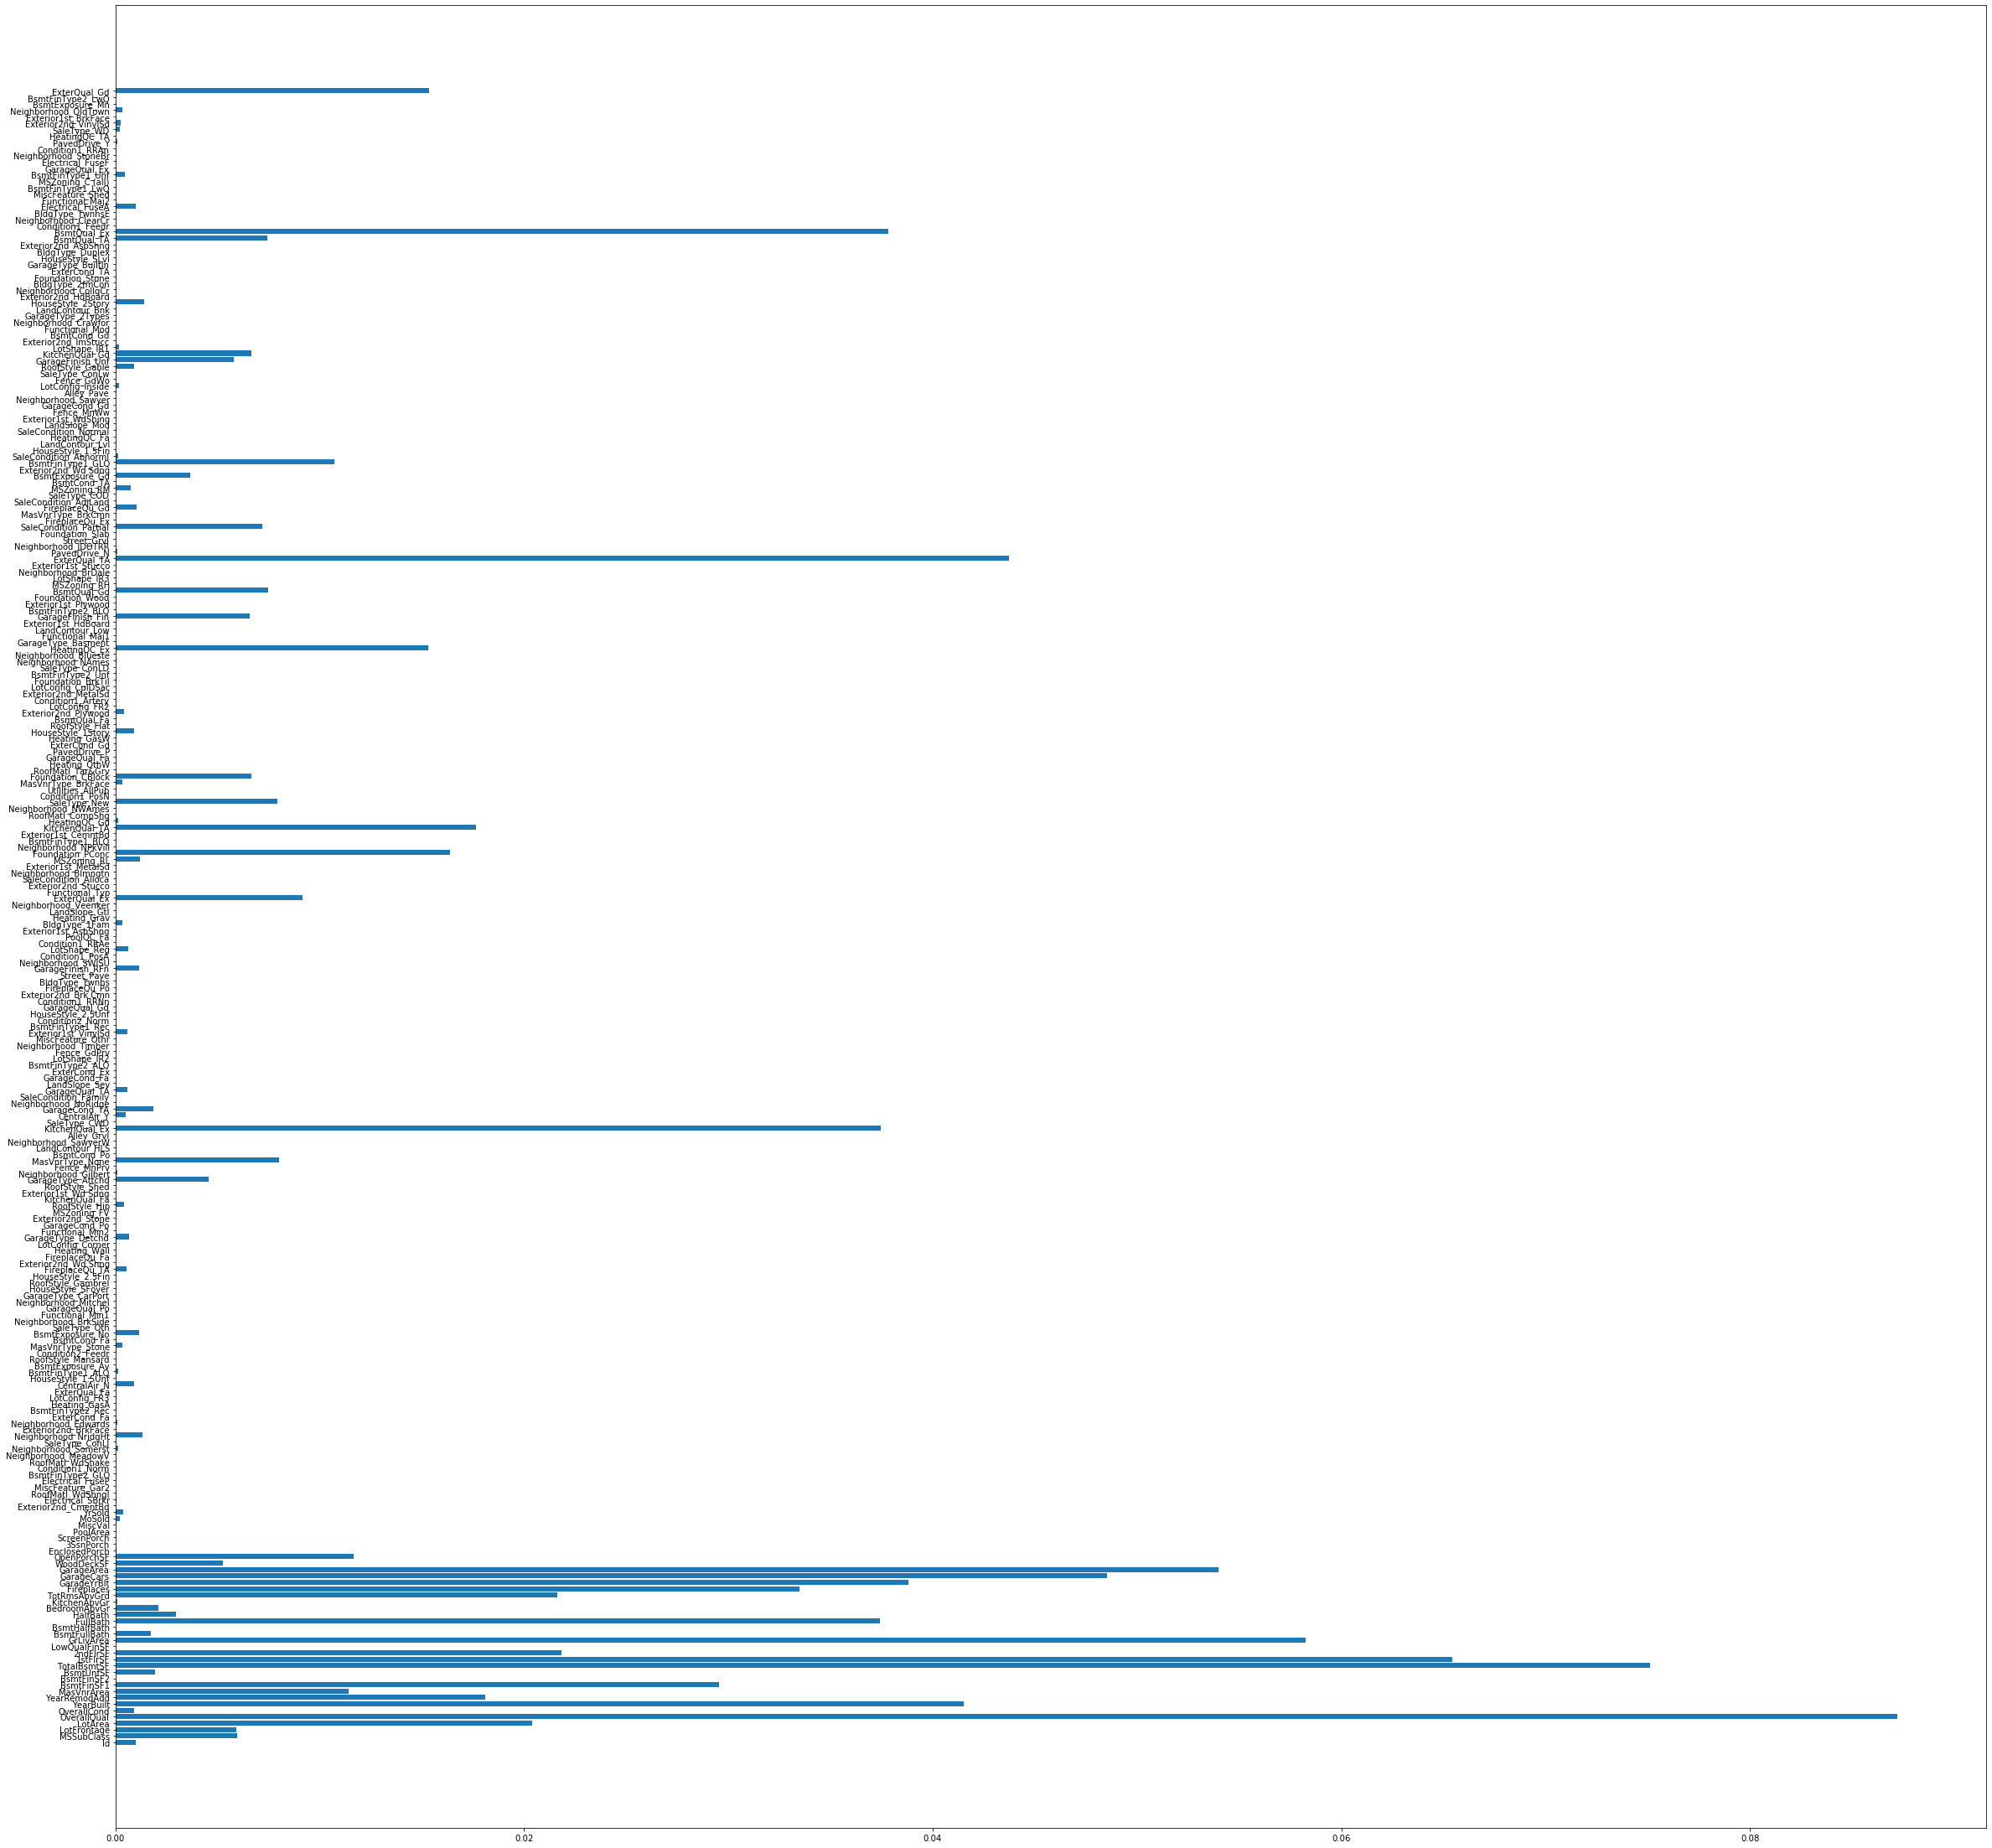

In [20]:
# важность признаков
plt.figure(figsize=(40, 40))
plt.barh(np.arange(len(rand_for_clf.feature_importances_)), rand_for_clf.feature_importances_)
plt.yticks(np.arange(len(X_train.columns)),X_train.columns)

In [21]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [23]:
estimators =  [
        ('lr', LinearRegression()),
        ('dt', DecisionTreeRegressor()),
        ('knn', KNeighborsRegressor()),
        ('svm', SVR())
    ]

In [24]:
regressor = StackingRegressor(
        estimators=estimators,
        final_estimator=RandomForestRegressor(n_estimators=10, random_state=42)
)

In [25]:
staking = regressor.fit(X_train, y_train).score(X_test, y_test)
staking

0.839788255565652

In [26]:
y_pred_staking = regressor.predict(X_test)
mean_squared_error_staking = mean_squared_error(y_test, y_pred_staking)
mean_squared_error_staking

1129428067.5230594

In [27]:
regressor2 = StackingRegressor(
        estimators=estimators,
        final_estimator=RandomForestRegressor(n_estimators=100, criterion='mse', max_depth=10, min_samples_split=20, min_samples_leaf=10,  n_jobs=-1)
)

In [28]:
staking2 = regressor2.fit(X_train, y_train).score(X_test, y_test)
staking

0.839788255565652

In [29]:
y_pred_staking2 = regressor2.predict(X_test)
mean_squared_error_staking2 = mean_squared_error(y_test, y_pred_staking2)
mean_squared_error_staking2

1104225288.5807295

посмотрим у кого наименьшая среднеквадратичная ошибка

In [30]:
result_error = [mean_squared_error_bagging, mean_squared_error_randforest, mean_squared_error_randforest2, mean_squared_error_staking, mean_squared_error_staking2 ]

In [31]:
print(f'{np.array(result_error).argmin()}:{min(result_error)}')

0:1083847766.151558


и наибольшее качество модели

In [32]:
result_score = [bagging, rand_for, rand_for2, staking, staking2 ]
print(f'{np.array(result_score).argmax()}:{max(result_score)}')

0:0.8462539170845715


В перебранных примерах оптимальный выбор для построение модели является бэкинг